# Diabetes Predictions in Pima Women

The following code will use four machine learning tools to determine if one tool is better than others in predicting diabetes in Pima Women, based on the data supplied. 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df = pd.read_csv('../input/diabetes-dataset/diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Following is a heatmat of correlation between various health variables and diabetes. The lighter the color, the more correlated a specific health variable is to being diabetic.

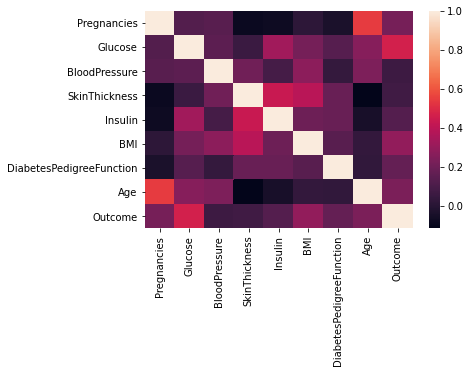

In [4]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

We're going to run Linear Regression, Gradient Boosting, Random Forest Classifier, and Support Vector Machine learnings tools from Scikit on three data frames: a "small" data frame, which will be anything that is 20% or more correlated to diabetes, a "medium" data frame, which will be anything that is 10% or more correlated, and a large data frame, which is all of the available data. By running all three, we can see if, in the case of this data set, focusing simply on correlation is beneficial or not in determining diabetes among Pima women.

In [5]:
corr[abs(corr['Outcome']) > 0.2]['Outcome']

Pregnancies    0.221898
Glucose        0.466581
BMI            0.292695
Age            0.238356
Outcome        1.000000
Name: Outcome, dtype: float64

In [6]:
corr[abs(corr['Outcome']) > 0.1]['Outcome']

Pregnancies                 0.221898
Glucose                     0.466581
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

In [7]:
small_df=df[['Pregnancies', 'Glucose', 'BMI', 'Age']]
med_df=df[['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
large_df = df.drop(columns=['Outcome'])

In [8]:
xs = small_df
xm = med_df
xl = large_df
y = df['Outcome']

## Linear Regression

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr=LogisticRegression(max_iter=10000)

In [10]:
x_train,x_test,y_train,y_test=train_test_split(xs,y,random_state=1,test_size=0.2)
lr.fit(x_train,y_train)
p1=lr.predict(x_test)
s1=accuracy_score(y_test,p1)
print("Small DF Linear Regression Success Rate :", "{:.2f}%".format(100*s1))

Small DF Linear Regression Success Rate : 77.27%


In [11]:
x_train,x_test,y_train,y_test=train_test_split(xm,y,random_state=1,test_size=0.2)
lr.fit(x_train,y_train)
p1=lr.predict(x_test)
s1=accuracy_score(y_test,p1)
print("Medium DF Linear Regression Success Rate :", "{:.2f}%".format(100*s1))

Medium DF Linear Regression Success Rate : 75.97%


In [12]:
x_train,x_test,y_train,y_test=train_test_split(xl,y,random_state=1,test_size=0.2)
lr.fit(x_train,y_train)
p1=lr.predict(x_test)
s1=accuracy_score(y_test,p1)
print("Large DF Linear Regression Success Rate :", "{:.2f}%".format(100*s1))

Large DF Linear Regression Success Rate : 77.92%


In terms of Linear Regression, both the small and large set return with the same or nearly the same accuracy - not terrible, but not outstanding either.

## Gradient Boosting

In [13]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()

In [14]:
x_train,x_test,y_train,y_test=train_test_split(xs,y,random_state=1,test_size=0.2)
gbc.fit(x_train,y_train)
p2=gbc.predict(x_test)
s2=accuracy_score(y_test,p2)
print("Small DF Gradient Booster Classifier Success Rate :", "{:.2f}%".format(100*s2))

Small DF Gradient Booster Classifier Success Rate : 80.52%


In [15]:
x_train,x_test,y_train,y_test=train_test_split(xm,y,random_state=1,test_size=0.2)
gbc.fit(x_train,y_train)
p2=gbc.predict(x_test)
s2=accuracy_score(y_test,p2)
print("Medium DF Gradient Booster Classifier Success Rate :", "{:.2f}%".format(100*s2))

Medium DF Gradient Booster Classifier Success Rate : 79.87%


In [16]:
x_train,x_test,y_train,y_test=train_test_split(xl,y,random_state=1,test_size=0.2)
gbc.fit(x_train,y_train)
p2=gbc.predict(x_test)
s2=accuracy_score(y_test,p2)
print("Large DF Gradient Booster Classifier Success Rate :", "{:.2f}%".format(100*s2))

Large DF Gradient Booster Classifier Success Rate : 80.52%


In terms of Gradient Boosting, all of the values vary with each run, where there is no clear leader; often the large set has the highest accuracy or is tied with the small set, whereas both the small and medium sets also often return the same values. Correlation seems to not be helpful in this situation.

## Random Forest Classifier

In [17]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [18]:
x_train,x_test,y_train,y_test=train_test_split(xs,y,random_state=1,test_size=0.2)
rfc.fit(x_train,y_train)
p3=rfc.predict(x_test)
s3=accuracy_score(y_test,p3)
print("Small DF Random Forest Classifier Success Rate :", "{:.2f}%".format(100*s3))

Small DF Random Forest Classifier Success Rate : 77.92%


In [19]:
x_train,x_test,y_train,y_test=train_test_split(xm,y,random_state=1,test_size=0.2)
rfc.fit(x_train,y_train)
p3=rfc.predict(x_test)
s3=accuracy_score(y_test,p3)
print("Medium DF Random Forest Classifier Success Rate :", "{:.2f}%".format(100*s3))

Medium DF Random Forest Classifier Success Rate : 78.57%


In [20]:
x_train,x_test,y_train,y_test=train_test_split(xl,y,random_state=1,test_size=0.2)
rfc.fit(x_train,y_train)
p3=rfc.predict(x_test)
s3=accuracy_score(y_test,p3)
print("Large DF Random Forest Classifier Success Rate :", "{:.2f}%".format(100*s3))

Large DF Random Forest Classifier Success Rate : 79.22%


In terms of using the Random Forest Classifier, the less correlation seems to be the better. The large set netted the highest accuracy (the best of any tool).

## Support Vector Classifier 

In [21]:
from sklearn.svm import SVC
svm=SVC()

In [22]:
x_train,x_test,y_train,y_test=train_test_split(xs,y,random_state=1,test_size=0.2)
svm.fit(x_train,y_train)
p4=svm.predict(x_test)
s4=accuracy_score(y_test,p4)
print("Small DF Support Vector Classifier Success Rate :", "{:.2f}%".format(100*s4))

Small DF Support Vector Classifier Success Rate : 78.57%


In [23]:
x_train,x_test,y_train,y_test=train_test_split(xm,y,random_state=1,test_size=0.2)
svm.fit(x_train,y_train)
p4=svm.predict(x_test)
s4=accuracy_score(y_test,p4)
print("Medium DF Support Vector Classifier Success Rate :", "{:.2f}%".format(100*s4))

Medium DF Support Vector Classifier Success Rate : 78.57%


In [24]:
x_train,x_test,y_train,y_test=train_test_split(xl,y,random_state=1,test_size=0.2)
svm.fit(x_train,y_train)
p4=svm.predict(x_test)
s4=accuracy_score(y_test,p4)
print("Large DF Support Vector Classifier Success Rate :", "{:.2f}%".format(100*s4))

Large DF Support Vector Classifier Success Rate : 78.57%


Using Support Vector Classifier, all three sets returned the same amount - 78.57% accuracy. 

# Initial Conclusion

Based on the four machine learning tools used, using the whole dataset with a Random Forest Classifier nets the best result - usually just above 80% accuracy.

80% and above isn't bad, but leaves room for improvement. 